#Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

(1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

(2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [184]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea

In [185]:
#Loading data and converting to dataframe
loan_df=pd.read_csv('loan.csv',low_memory = False)

# Data Cleaning

### Remove unnecessary rows

In [186]:
#Basic details of data
print(loan_df.shape)
total_rows = len(loan_df)
print("Total number of rows : ", total_rows)

(39717, 111)
Total number of rows :  39717


In [188]:
#Check for header
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [189]:
#Check for trailers/summary
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
#Remove duplicate rows
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Duplicate rows:",round(duplicate_rows,2))

Duplicate rows: 0


In [191]:
#Remove loan status current as it does not contribute to the analysis
print(loan_df['loan_status'].value_counts())
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Rows after removing current status: ",len(loan_df))

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
Rows after removing current status:  38577


In [192]:
rows_removed=((total_rows- len(loan_df))*100)/total_rows
print("Percentage of rows removed: ", round(rows_removed,2))

Percentage of rows removed:  2.87


### Removing not so useful columns

In [193]:
#checking shape
print(loan_df.shape)

(38577, 111)


In [194]:
#Check column values
print((loan_df.isnull().sum()*100)/len(loan_df))

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.472717
purpose                             0.000000
title                               0.028514
zip_code  

In [195]:
#Check columns with only NA values
print("Number of columns with values only as NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA columns List:")
na_columns

Number of columns with values only as NA:  55
NA columns List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [196]:
#Remove columns with only NA values
loan_df = loan_df.dropna(axis=1, how="all")
loan_df.shape

(38577, 56)

In [197]:
#Remove text or descriptive fields
other_text_fields = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
other_text_fields

['id', 'member_id', 'url']

In [198]:
#desc, title,Employee title are two descriptive fields
loan_df.drop(columns=['desc','title', 'id', 'url','emp_title'],inplace=True)
loan_df.shape

(38577, 51)

In [199]:
#Limit analysis to group level, drop sub-grade column
loan_df = loan_df.drop(['sub_grade'],  axis=1)
#Behavioural data removal - as it is captured after loan approval
behavioural_columns = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']
loan_df = loan_df.drop(behavioural_columns,  axis=1)
#Checking for columns which might not add any value
loan_df.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [200]:
#Remove columns with values as 1 only
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)

#Removing column with more than 50% null values
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
mths_since_last_delinq
mths_since_last_record


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
6,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,0.0
7,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35,0.0
8,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,958xx,CA,5.55,0.0
9,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,774xx,TX,18.08,0.0
10,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,5 years,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,853xx,AZ,16.12,0.0


In [201]:
loan_df.shape

(38577, 19)

# 2. Data Conversion

In [202]:
loan_df.dtypes

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [203]:
# Convert the loan_amnt and funded_amnt to float
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
#Rounding off
# Rounding off the belows to two decimals points.
for column in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    loan_df[column] = loan_df[column].apply(lambda x: round(x,2))

In [204]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [205]:
# Convert term from string to int.
def clean_term(term):
    term = str(term)
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(clean_term) ## removing the string parts of int value
loan_df['term'].dtype

dtype('int64')

In [206]:
loan_df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [207]:
loan_df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
         ... 
17.15%      2
17.90%      2
14.70%      2
15.01%      2
15.07%      2
15.83%      2
10.64%      2
13.84%      2
17.03%      2
14.88%      2
14.07%      2
20.20%      2
14.25%      2
16.96%      1
17.44%      1
21.48%      1
18.36%      1
18.72%      1
16.71%      1
17.34%      1
22.94%      1
17.46%      1
16.01%      1
20.52%      1
14.67%      1
16.15%      1
22.64%      1
16.20%      1
17.54%      1
24.40%      1
Name: int_rate, Length: 370, dtype: int64

In [208]:
# Convert int_rate from string to float
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)

In [209]:
loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    344
7.14     341
6.99     336
        ... 
15.83      2
13.84      2
14.62      2
17.15      2
14.07      2
14.88      2
15.38      2
15.01      2
14.25      2
14.70      2
17.03      2
15.07      2
20.20      2
16.20      1
17.54      1
16.96      1
17.44      1
16.15      1
14.67      1
22.94      1
24.40      1
18.36      1
17.34      1
16.01      1
18.72      1
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [210]:
loan_df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [211]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [212]:
#Rounding off to two decimals points.
for element in ['int_rate', 'dti']:
    loan_df[element] = loan_df[element].apply(lambda x: round(x,2))
    print(loan_df[element])

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
30        7.51
         ...  
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39692     9.01
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2        

In [213]:
#Converting 'issue_d' to date type
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
8       2011-12-01
9       2011-12-01
10      2011-12-01
11      2011-12-01
12      2011-12-01
13      2011-12-01
14      2011-12-01
15      2011-12-01
16      2011-12-01
17      2011-12-01
18      2011-12-01
19      2011-12-01
20      2011-12-01
21      2011-12-01
22      2011-12-01
23      2011-12-01
24      2011-12-01
25      2011-12-01
26      2011-12-01
27      2011-12-01
28      2011-12-01
29      2011-12-01
30      2011-12-01
           ...    
39687   2007-08-01
39688   2007-08-01
39689   2007-07-01
39690   2007-07-01
39691   2007-07-01
39692   2007-07-01
39693   2007-07-01
39694   2007-07-01
39695   2007-07-01
39696   2007-07-01
39697   2007-07-01
39698   2007-07-01
39699   2007-07-01
39700   2007-07-01
39701   2007-07-01
39702   2007-07-01
39703   2007-07-01
39704   2007-07-01
39705   2007-07-01
39706   2007-07-01
39707   2007-07-01
39708   2007

In [214]:
#Check for null values
(loan_df.isnull().sum()*100)/len(loan_df)

member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

# 3. Dropping/ Imputing the rows.

In [215]:
previous_rows=len(loan_df)
previous_rows

38577

In [216]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [217]:
after_rows=len(loan_df)
total_deleted=((previous_rows-after_rows)*100)/previous_rows
print("Percentage of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Percentage of rows deleted: 4.48
(36847, 19)


In [218]:
#Finding other NAN values
(loan_df.isnull().sum()*100)/len(loan_df)

member_id               0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [223]:
#Converting employee length properly
def employee_length_conversion(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : employee_length_conversion(x) )
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
6         8
7         9
8         4
9         1
10        5
11       10
12        1
13        3
14        3
15        1
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
26        9
27        2
28       10
29        1
30        7
         ..
38998     1
38999     7
39000    10
39001     1
39002     4
39003     6
39013     4
39025     1
39052     1
39084    10
39138    10
39216    10
39220     4
39251     1
39259     1
39288    10
39291     5
39346     1
39348    10
39362    10
39425     1
39430     9
39433     7
39475     6
39551     2
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


# 4. Derived Columns.

In [224]:
# Derived column for issue month and issue year
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


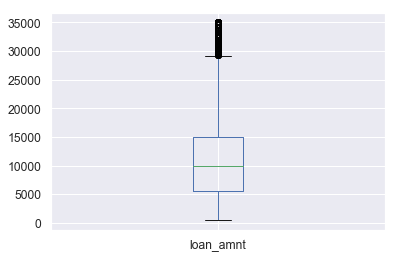

In [225]:
print(loan_df.shape)
print(loan_df["loan_amnt"].describe())
loan_df['loan_amnt'].plot(kind='box')

# 5. Univariate Analysis

In [226]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [227]:
#Bucketing loan amount for better analysis
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [228]:
#Bucketing Annual Income for better analysis
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [288]:
# Bucketing interest rate for better analysis
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x['int_rate']), axis = 1)

In [229]:
# Bucketing dti for better analysis
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [230]:
# Univariate function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

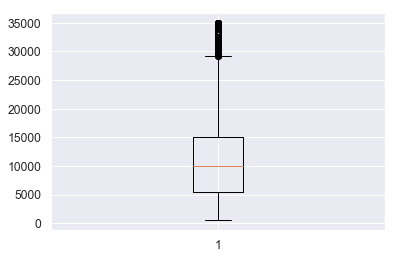

In [231]:
plot.boxplot(loan_df['loan_amnt'],)
plot.show()

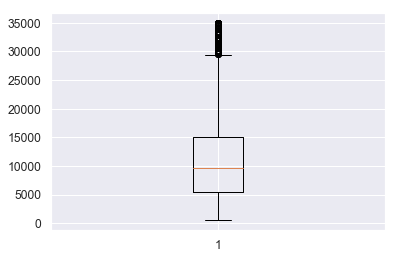

In [232]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

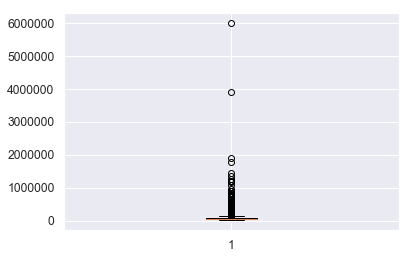

In [234]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

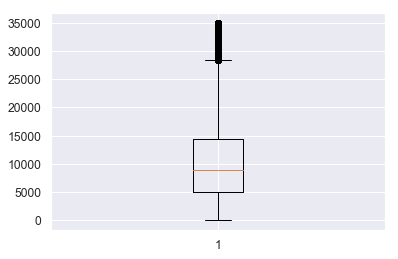

In [235]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

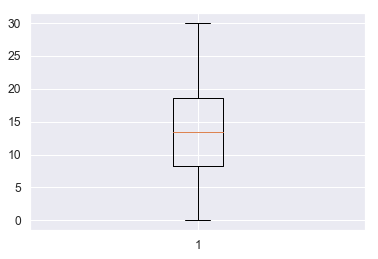

In [237]:
plot.boxplot(loan_df['dti'])
plot.show()

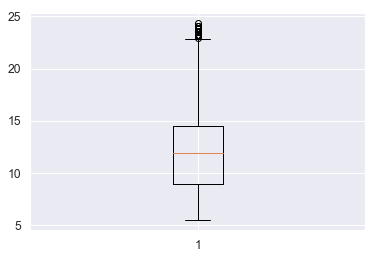

In [238]:
plot.boxplot(loan_df['int_rate'])
plot.show()

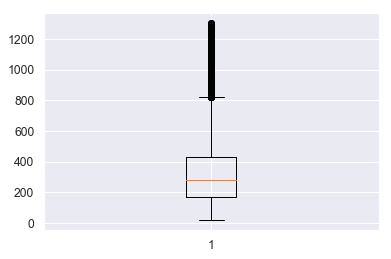

In [239]:
plot.boxplot(loan_df['installment'])
plot.show()

In [240]:
# Removing outliers for columns loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']

def remove_outliers(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

loan_df =remove_outliers(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers(loan_df, outliers_columns_set2,1.5)

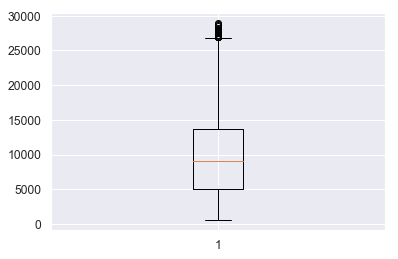

In [241]:
plot.boxplot(loan_df['loan_amnt'])
plot.show()

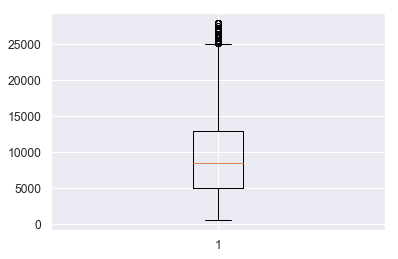

In [242]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

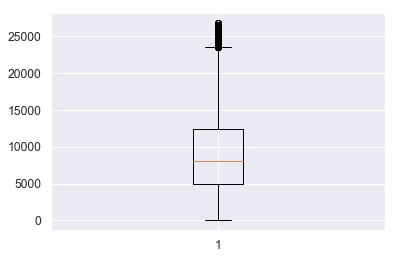

In [243]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

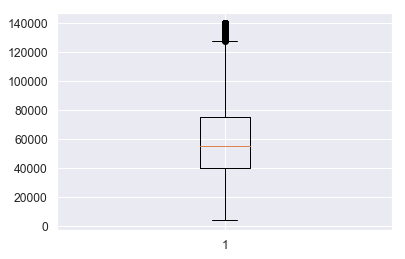

In [244]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

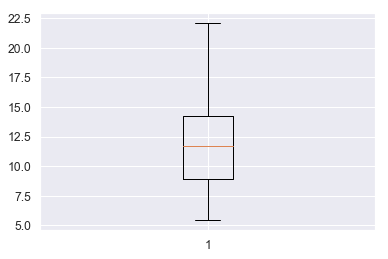

In [245]:
plot.boxplot(loan_df['int_rate'])
plot.show()

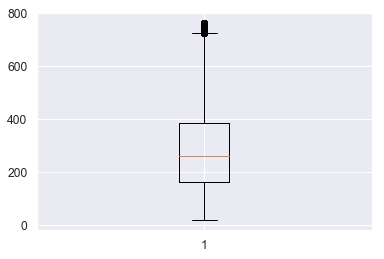

In [246]:
plot.boxplot(loan_df['installment'])
plot.show()

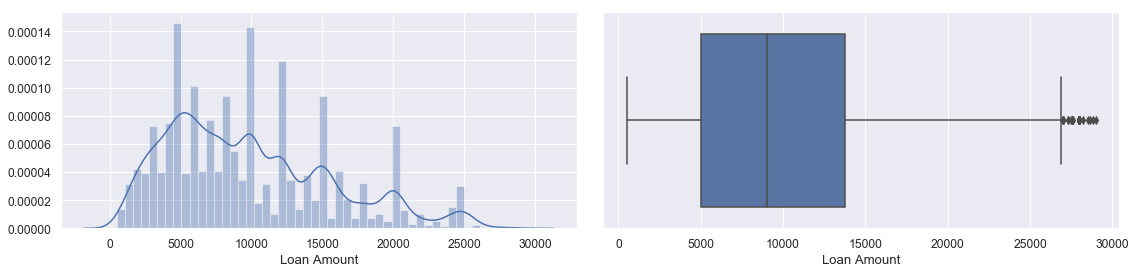

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [247]:
plot_digram(loan_df, 'loan_amnt')
loan_df['loan_amnt'].describe()

In [248]:
#Observation : Loan amount mostly in the range of 5000 to 140000. Median loan amount is ~9000.
print("Mean loan amount:", round(loan_df["loan_amnt"].mean(),2))

Mean loan amount: 9820.84


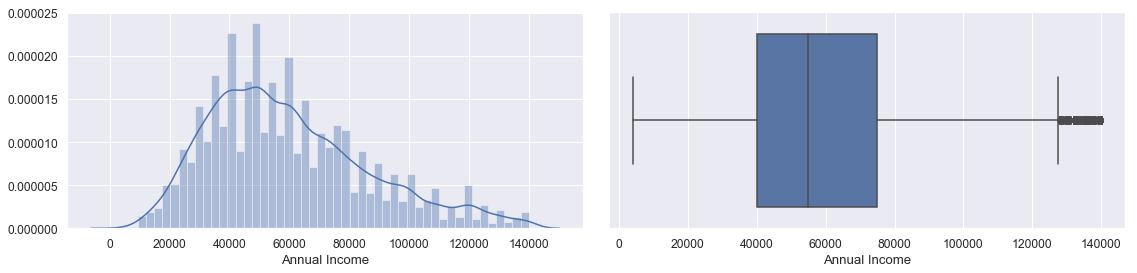

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [249]:
plot_digram(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

In [250]:
#Observation : Annual Income mostly in the range of 40000 to 750000. Median annual income is 55000.
print("Mean annual income:", round(loan_df["annual_inc"].mean(),2))

Mean annual income: 59883.28


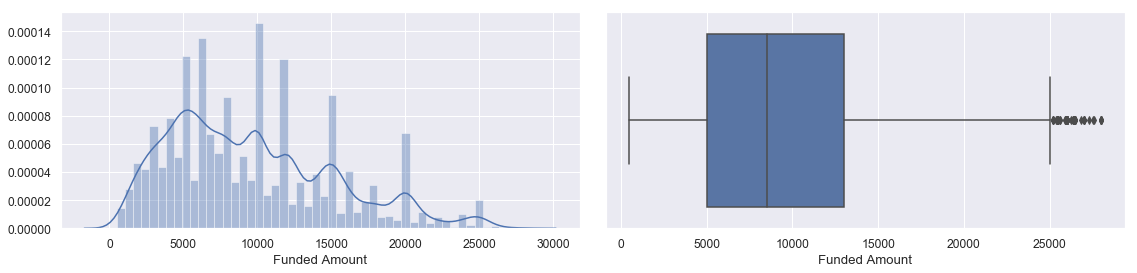

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [251]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

In [252]:
#Observation : Funded amount mostly in the range of 5000 to 130000. Median funded amount is 8500.
print("Mean funded amount:", round(loan_df["funded_amnt"].mean(),2))

Mean funded amount: 9593.83


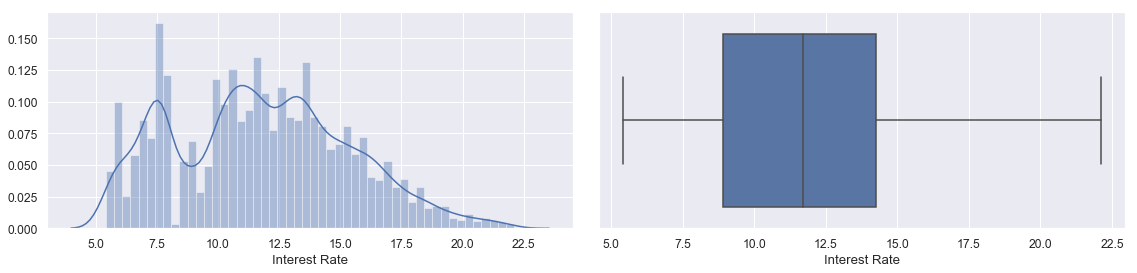

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [253]:
plot_digram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

In [112]:
#Observation: Interest rate mostly in the range of 8.9% to 14.26%. Median interest rate is 11.71%.

### Unordered Categorical Variable Analysis

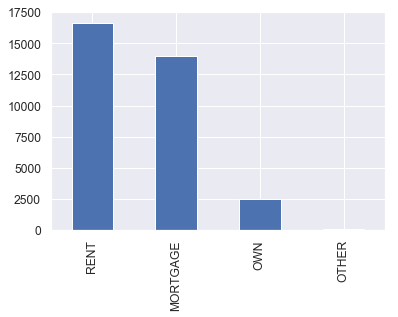

In [254]:
loan_df['home_ownership'].value_counts().plot.bar()

In [115]:
#Observation : Most loan applicants stay on rent or have a mortgage.

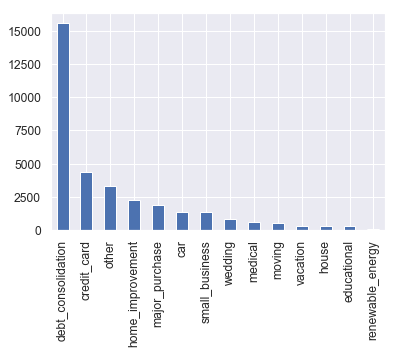

In [255]:
loan_df['purpose'].value_counts().plot.bar()

In [118]:
# Most of the loan applicants are are planning to use the loan for debt_consolidations.

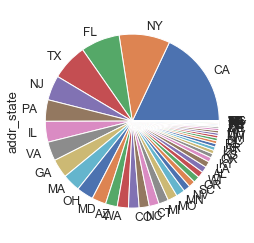

In [257]:
loan_df['addr_state'].value_counts().plot(kind='pie')

In [121]:
#Observation : Most loan applicants are from CA.

### Ordered Categorical Variable Analysis

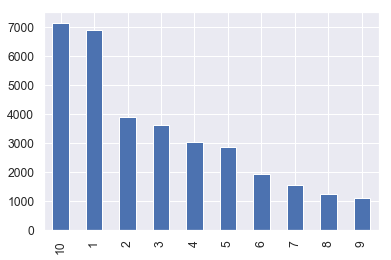

In [258]:
loan_df['emp_length'].value_counts().plot.bar()

In [125]:
#Observation : Most loan applicants have either 10 or more yearsof experience or have ~1 year of experience.

### 6. Bivariate analysis

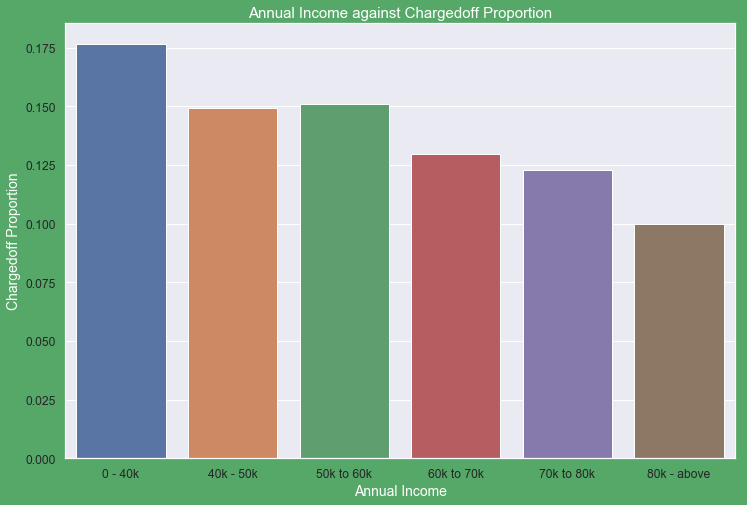

In [265]:
#Bivariate Analysis on annual income against Chargedoff_Proportion
inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
#Visualising the data
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Annual Income against Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()

In [285]:
# Observations: Income range 0-20000 has highest chances of being charged off. 
#Income range 80000+ has least chances of being charged off.
# With increase in annual income, charged off proportion reduces.

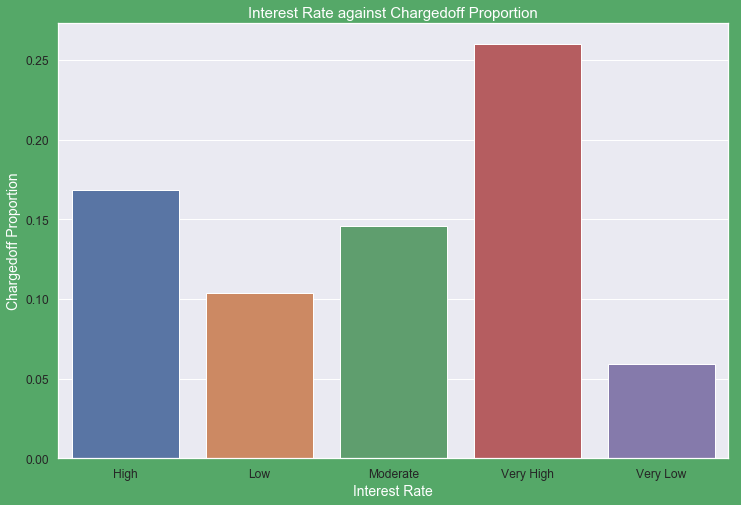

In [289]:
#Bivariate Analysis on Interest rate against Chargedoff_Proportion
interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Interest Rate against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [139]:
# Observations:
# Loans with interest rate less than 10% or very low has very less chances of charged off. Interest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chances of charged off as compared to other interest rates.
# Charged off proportion is increasing with higher interest rates.

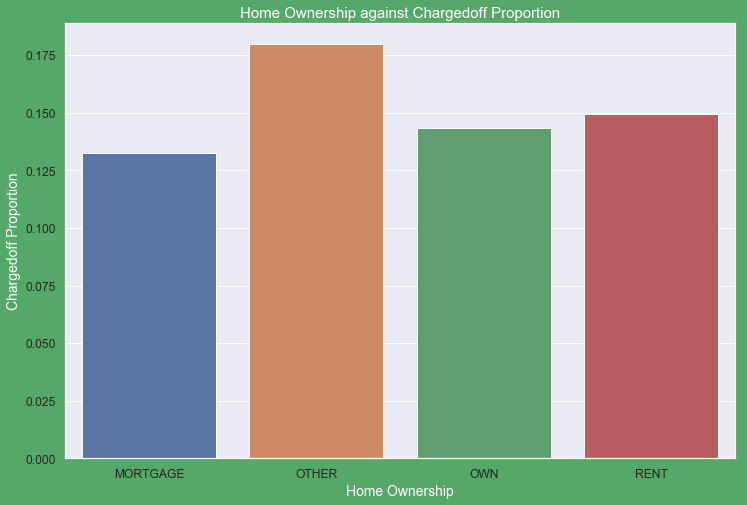

In [268]:
#Bivariate Analysis for Home Ownership against Chargedoff_Proportion -
home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Home Ownership against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [142]:
# Observation : Charged off proportion is least for mortgages.

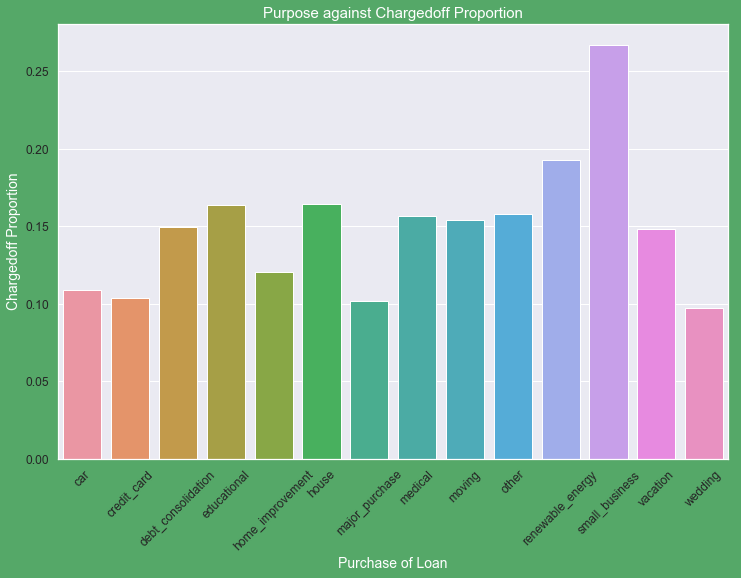

In [269]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -
purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Purpose against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [145]:
#Observation : Applicants using the loan for small business are more prone to loan defaults.

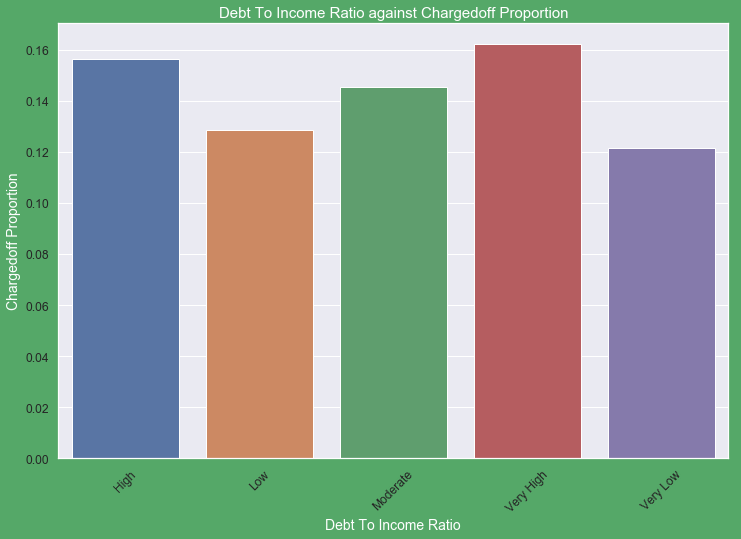

In [270]:
#Bivariate Analysis on DTI against Chargedoff_Proportion
dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Debt To Income Ratio against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [148]:
#Observation : Higher the DTI, higher is the chances of loan default.

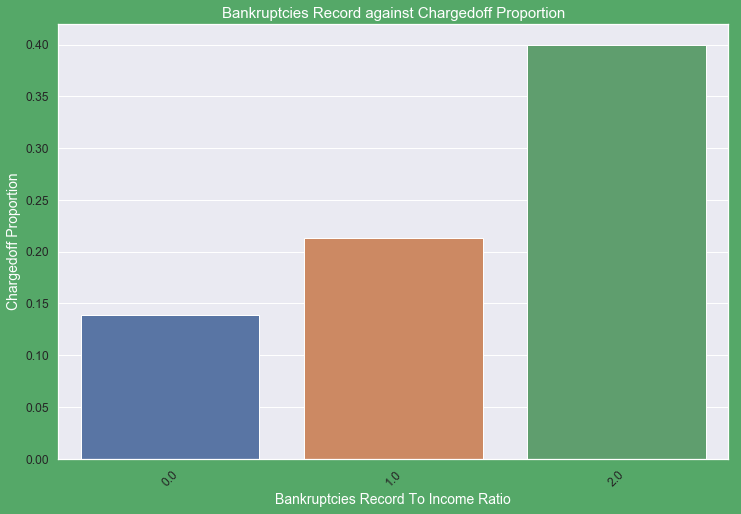

In [271]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Bankruptcies Record against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [151]:
#Observation : Applicants with bankruptcy record as 2.0 have higher loan defaults.

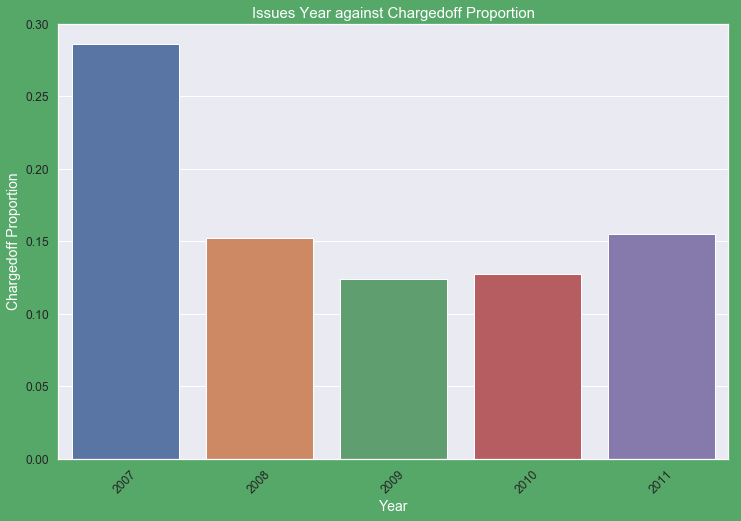

In [272]:
# Bivariate Analysis on Issues of Year against Chargedoff_Proportion -
issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Issues Year against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [155]:
#Observation : 2007 has highest number of loan defaults.

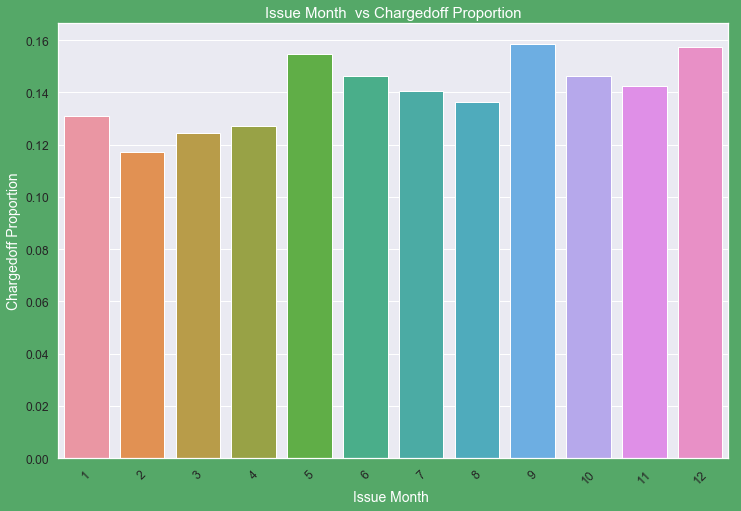

In [273]:
#Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion
issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [160]:
#Observation : For applicants where loan has been issued in May, September or December, loan defaults is highest. 
#For applicants where loan has been issued in February, loan defaults is lowest.

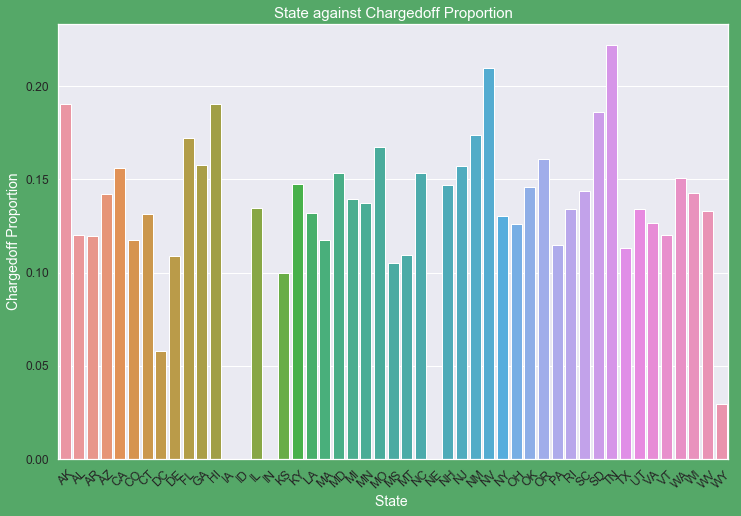

In [274]:
#Bivariate Analysis on Address state  against Chargedoff_Proportion -
addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('State against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [163]:
# Observations:TN and NV have highest number of loan defaults. 

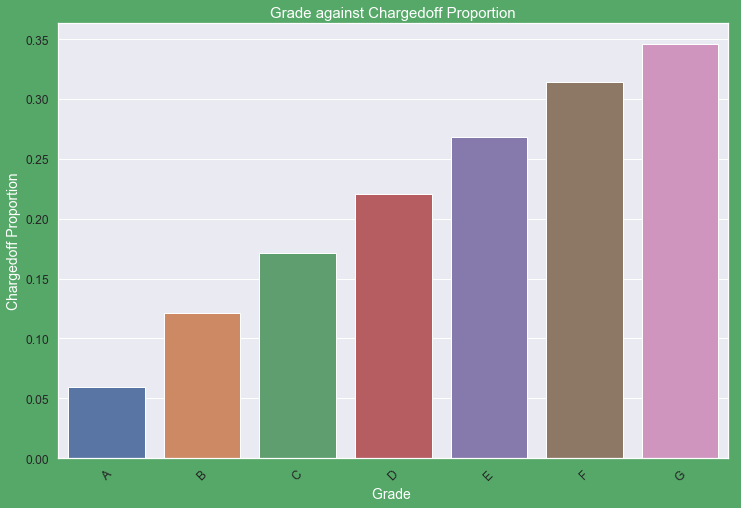

In [275]:
#Bivariate Analysis on Grade against Chargedoff_Proportion -
grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Grade against Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [166]:
#Observation : As the grade moves from A to G, the loan defaults also increase.

# 7. Correlation analysis

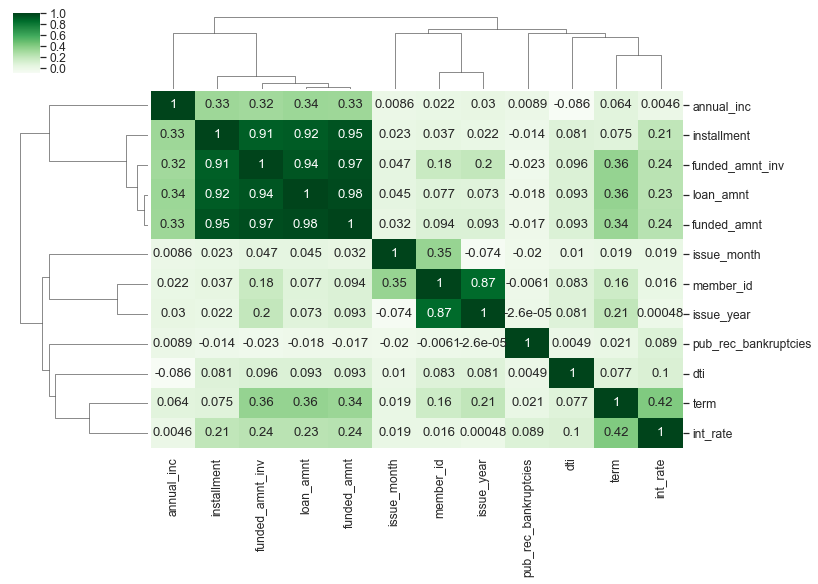

In [276]:
corr_loan = loan_df
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plot.show()

In [277]:
drop_columns = ['issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

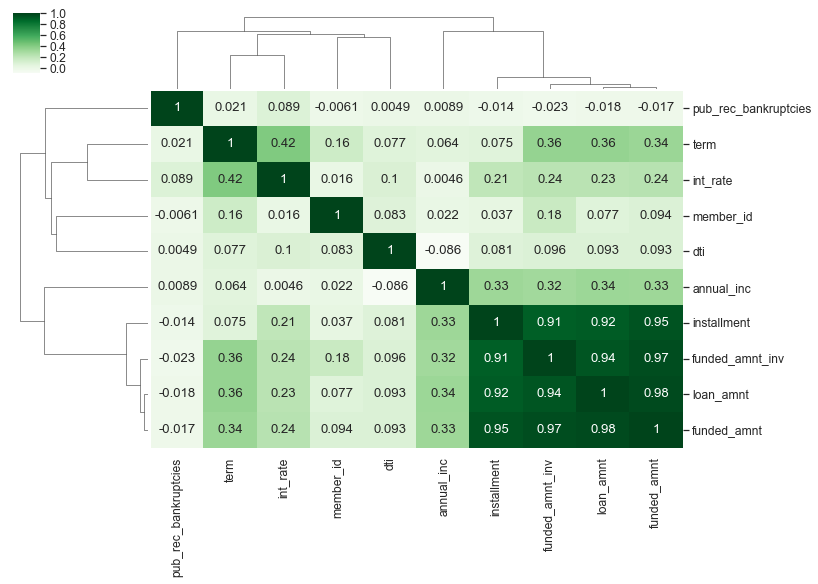

In [278]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plot.show()

In [183]:
# Observations : 1.Term has a strong correlation with loan amount and interest rate.
#2. Annual income has strong correlation with loan_amount.
#3. Annual income has negative correlation with debt to income ratio.
#4. Loan amount has negative correlation with public record bankruptcies.
#5. The total amount committed to that loan at a point in time, the total amount committed by investors for that loan at 
#   that point, The monthly payment owed by the borrower if the loan originates and the amount of loan are highly correlated.